In [ ]:
#@title Informasi Dataset

import pandas as pd
import numpy as np

# Koreksi Pemuatan Data dengan Pemisah (sep=';') agar rapi
wine_red = pd.read_csv(
    '/content/drive/MyDrive/wine quality/winequality-red.csv',
    sep=';'
)
wine_white = pd.read_csv(
    '/content/drive/MyDrive/wine quality/winequality-white.csv',
    sep=';'
)


In [ ]:
#mengabungkan kedua data set
#Menambahkan Fitur wine_type
# 0 untuk Anggur Merah, 1 untuk Anggur Putih
#Feature Engineering
wine_red['wine_type'] = 0
wine_white['wine_type'] = 1


In [ ]:
print(f"Data Anggur Merah (wine_red) dimuat: {wine_red.shape[0]} baris.")
print(f"Data Anggur Putih (wine_white) dimuat: {wine_white.shape[0]} baris.")

Data Anggur Merah (wine_red) dimuat: 1599 baris.
Data Anggur Putih (wine_white) dimuat: 4898 baris.


In [ ]:
# Menggabungkan kedua dataset
wine_quality = pd.concat([wine_red, wine_white], ignore_index=True)

In [ ]:
print(f"\nTotal data gabungan (wine_quality): {wine_quality.shape[0]} baris, {wine_quality.shape[1]} fitur.")


Total data gabungan (wine_quality): 6497 baris, 13 fitur.


In [ ]:
print("Ringkasan Statistik Data Gabungan")
print(wine_quality.describe().T)
wine_quality.head()

Ringkasan Statistik Data Gabungan
                       count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:

wine_quality.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
# Menyimpan jumlah duplikat untuk Data Preparation
N_DUPLICATES_TO_REMOVE = wine_quality.duplicated().sum()

In [ ]:
#@title kondisi data
print("\n--- 1. Pengecekan Missing Values ---")
# Menghitung jumlah nilai NULL/NA per kolom
print(wine_quality.isnull().sum().sort_values(ascending=False))


--- 1. Pengecekan Missing Values ---
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [ ]:
# --- 2. Duplicate Data ---
n_duplicates = wine_quality.duplicated().sum()
print(f"\n--- 2. Pengecekan Duplicate Data ---")
print(f"Jumlah baris duplikat yang ditemukan: {n_duplicates} baris.")


--- 2. Pengecekan Duplicate Data ---
Jumlah baris duplikat yang ditemukan: 1177 baris.


In [ ]:
# --- 3. Imbalanced Data (Distribusi Kelas Target) ---
print("\n--- 3. Pengecekan Imbalanced Data (Distribusi Skor Kualitas Original) ---")
# Menghitung frekuensi setiap skor kualitas (0-10)
target_counts = wine_quality['quality'].value_counts().sort_index()
print(target_counts)


--- 3. Pengecekan Imbalanced Data (Distribusi Skor Kualitas Original) ---
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


In [ ]:
# --- 4. Indikasi Outliers dan Noise ---
print("\n--- 4. Indikasi Outliers (Melalui Perbandingan Mean, Min, dan Max) ---")
print("Perhatikan Jangkauan Nilai (Min vs Max) dibandingkan Mean:")
print(wine_quality[['residual sugar', 'chlorides', 'total sulfur dioxide', 'alcohol']].describe().loc[['mean', 'min', 'max']])


--- 4. Indikasi Outliers (Melalui Perbandingan Mean, Min, dan Max) ---
Perhatikan Jangkauan Nilai (Min vs Max) dibandingkan Mean:
      residual sugar  chlorides  total sulfur dioxide    alcohol
mean        5.443235   0.056034            115.744574  10.491801
min         0.600000   0.009000              6.000000   8.000000
max        65.800000   0.611000            440.000000  14.900000


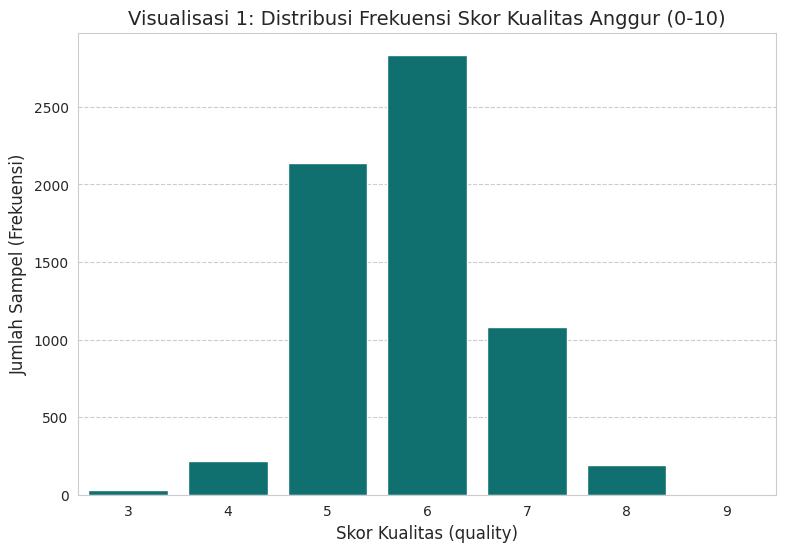

In [ ]:
#@title Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
# --- Visualisasi 1: Class Distribution Plot ---
plt.figure(figsize=(9, 6))
# Menggunakan warna tunggal (misalnya 'teal') untuk menghindari warning
sns.countplot(x='quality', data=wine_quality, color='teal')
plt.title('Visualisasi 1: Distribusi Frekuensi Skor Kualitas Anggur (0-10)', fontsize=14)
plt.xlabel('Skor Kualitas (quality)', fontsize=12)
plt.ylabel('Jumlah Sampel (Frekuensi)', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

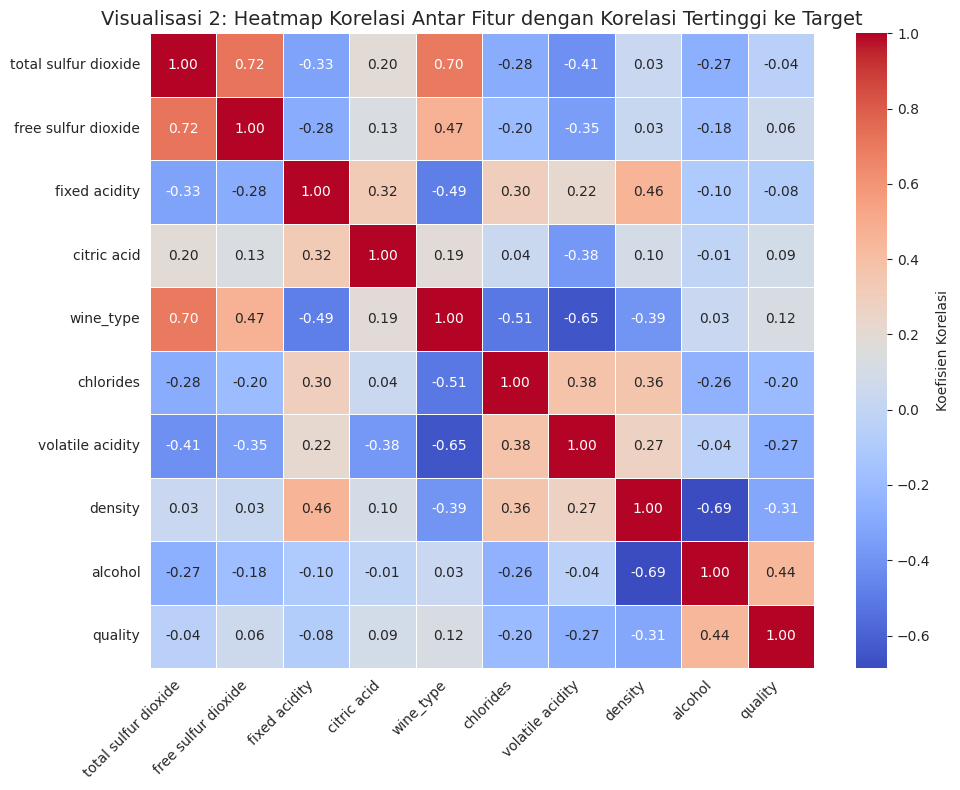

In [ ]:
# --- Visualisasi 2: Correlation Heatmap ---
plt.figure(figsize=(10, 8))
corr_matrix = wine_quality.corr()
# Fokus pada 10 fitur yang memiliki korelasi tertinggi ke target 'quality'
top_corr_features = corr_matrix.index[abs(corr_matrix["quality"]).argsort()[-10:]]
sns.heatmap(wine_quality[top_corr_features].corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            cbar_kws={'label': 'Koefisien Korelasi'})
plt.title('Visualisasi 2: Heatmap Korelasi Antar Fitur dengan Korelasi Tertinggi ke Target', fontsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('eda_vis_2_correlation_heatmap.png')
plt.show()

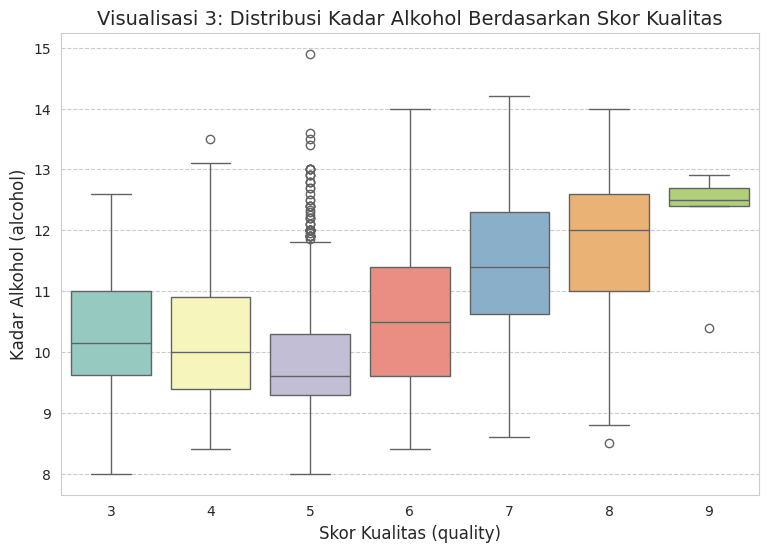

In [ ]:
# --- Visualisasi 3: Boxplot of Alcohol Content vs. Quality
plt.figure(figsize=(9, 6))
sns.boxplot(
    x='quality',
    y='alcohol',
    data=wine_quality,
    hue='quality',            # Variabel yang digunakan untuk membedakan warna
    palette='Set3',
    legend=False              # Menonaktifkan legend karena hue sama dengan x
)
plt.title('Visualisasi 3: Distribusi Kadar Alkohol Berdasarkan Skor Kualitas', fontsize=14)
plt.xlabel('Skor Kualitas (quality)', fontsize=12)
plt.ylabel('Kadar Alkohol (alcohol)', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

DATA **PREPARATION**

In [ ]:
#@title 5.1 Data Cleaning

#Menghapus Duplikat (Removing Duplicates)
n_duplicates = wine_quality.duplicated().sum()

if n_duplicates > 0:
    wine_quality_clean = wine_quality.copy()
    wine_quality_clean.drop_duplicates(inplace=True)
else:
    wine_quality_clean = wine_quality.copy()
    print("1. Tidak ada data duplikat untuk dihapus.")
    print(f"2. Pengecekan Missing Values: {wine_quality_clean.isnull().sum().sum()} (Tidak Ada)")


In [ ]:
duplicates_after_cleaning = wine_quality_clean.duplicated().sum()
print(f"Jumlah duplikat (Setelah Cleaning): {duplicates_after_cleaning} baris.")

Jumlah duplikat (Setelah Cleaning): 0 baris.


In [ ]:
#@title 5.2: feature engineering (Creating New Features)

# Tujuan: Mengubah masalah 7-kelas (3-9) menjadi 3-kelas Klasifikasi Multi-kelas
# Definisi Kelas: 0 (Buruk: 0-4), 1 (Normal: 5-6), 2 (Baik: 7-10)
bins = [0, 4, 6, 10]
labels = [0, 1, 2]

wine_quality_clean['quality_class'] = pd.cut(
    wine_quality_clean['quality'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
).astype(int)

# Menghapus variabel target original dari fitur input.
X_raw = wine_quality_clean.drop(['quality', 'quality_class'], axis=1)
y = wine_quality_clean['quality_class']
print(f"\n   X_raw (Fitur Input) shape: {X_raw.shape}")
print(f"   y (Target Klasifikasi) shape: {y.shape}")


   X_raw (Fitur Input) shape: (5320, 12)
   y (Target Klasifikasi) shape: (5320,)


In [ ]:
print(wine_quality_clean.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type  quality_class  
0      9.4        5          0        

5.3 Data **Transformation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
#data tabular
# 1. Inisialisasi StandardScaler
scaler = StandardScaler()
# 2. Terapkan Scaling pada seluruh Himpunan Fitur X_raw
# Fitur wine_type (0/1) juga di-scale.
X_scaled_array = scaler.fit_transform(X_raw)
# 3. Konversi kembali ke DataFrame untuk kemudahan inspeksi
feature_names = X_raw.columns.tolist()
X_scaled = pd.DataFrame(X_scaled_array, columns=feature_names, index=X_raw.index)

print("1. Standardization (StandardScaler) Selesai Diterapkan pada seluruh X_raw.")
print(f"   X_scaled shape: {X_scaled.shape}")
print(f"   Contoh 5 Baris Pertama X_scaled:")
print(X_scaled.head())

1. Standardization (StandardScaler) Selesai Diterapkan pada seluruh X_raw.
   X_scaled shape: (5320, 12)
   Contoh 5 Baris Pertama X_scaled:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.140064          2.115349    -2.164515       -0.699699   0.523880   
1       0.443199          3.185297    -2.164515       -0.544135   1.120736   
2       0.443199          2.471998    -1.892672       -0.610806   0.957957   
3       3.019841         -0.381197     1.641293       -0.699699   0.496751   
5       0.140064          1.877583    -2.164515       -0.721923   0.496751   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.069272             -1.411143  1.100996  1.779304   0.177941   
1            -0.282905             -0.829839  0.763753 -0.153797   0.979389   
2            -0.844596             -1.058837  0.831202  0.220351   0.779027   
3            -0.732258             -0.953146  1.168444 -0.403229   0.31151

In [ ]:
from sklearn.model_selection import train_test_split

5.4 Data Splitting


In [ ]:
# --- 1. DATA SPLITTING (5.4) ---
# Membagi X_scaled dan y menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Kritis: Mempertahankan rasio kelas
)
print("1. Data Splitting (80:20 Stratified Split) Selesai.")
print(f"   X_train shape: {X_train.shape} | Sampel Training: {X_train.shape[0]}")
print(f"   X_test shape: {X_test.shape} | Sampel Testing: {X_test.shape[0]}")

1. Data Splitting (80:20 Stratified Split) Selesai.
   X_train shape: (4256, 12) | Sampel Training: 4256
   X_test shape: (1064, 12) | Sampel Testing: 1064


5.5 Data Balancing


In [ ]:
# DATA BALANCING
# Menghitung bobot kelas berdasarkan distribusi y_train
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(zip(np.unique(y_train), weights))

print("\n2. Class Weights Dihitung (untuk Model LR dan MLP).")
print(f"   Bobot Kelas (0:Buruk, 1:Normal, 2:Baik): {class_weights_dict}")


2. Class Weights Dihitung (untuk Model LR dan MLP).
   Bobot Kelas (0:Buruk, 1:Normal, 2:Baik): {np.int64(0): np.float64(7.506172839506172), np.int64(1): np.float64(0.43517382413087935), np.int64(2): np.float64(1.7579512598099958)}


In [ ]:
# TARGET ENCODING untuk Deep Learning (OHE) ---
# Mengubah target y_train dan y_test menjadi One-Hot Encoded (OHE)

y_train_ohe = to_categorical(y_train, num_classes=3)
y_test_ohe = to_categorical(y_test, num_classes=3)


6. MODELING

In [ ]:
#@title 6.1 Model 1 — Baseline Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import time
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score


In [ ]:
class_weights_dict = {
    0: 7.506172839506172,
    1: 0.43517382413087935,
    2: 1.7579512598099958
}
print(f"Menggunakan Bobot Kelas: {class_weights_dict}")
print("-" * 50)

Menggunakan Bobot Kelas: {0: 7.506172839506172, 1: 0.43517382413087935, 2: 1.7579512598099958}
--------------------------------------------------


In [ ]:
start_time = time.time()

model_baseline = LogisticRegression(
    # Hyperparameter
    C=1.0,
    solver='lbfgs',
    max_iter=1000,
    penalty='l2',
    random_state=42,
    # Menerapkan Class Weights (Kritis untuk Imbalance Data)
    class_weight=class_weights_dict
)

model_baseline.fit(X_train, y_train)



LogisticRegression(class_weight={0: 7.506172839506172, 1: 0.43517382413087935,
                                 2: 1.7579512598099958},
                   max_iter=1000, random_state=42)

In [ ]:
end_time = time.time()
training_time_baseline = end_time - start_time
print(f"Pelatihan Selesai. Waktu Training: {training_time_baseline:.4f} detik")

Pelatihan Selesai. Waktu Training: 0.0618 detik


In [ ]:
# --- 2. PREDIKSI & EVALUASI ---
y_pred_baseline = model_baseline.predict(X_test)

# Laporan Klasifikasi
print(classification_report(y_test, y_pred_baseline, target_names=['0: Buruk', '1: Normal', '2: Baik']))

              precision    recall  f1-score   support

    0: Buruk       0.13      0.66      0.22        47
   1: Normal       0.88      0.48      0.62       815
     2: Baik       0.40      0.76      0.53       202

    accuracy                           0.54      1064
   macro avg       0.47      0.63      0.46      1064
weighted avg       0.76      0.54      0.59      1064



In [ ]:

print(confusion_matrix(y_test, y_pred_baseline))

[[ 31  14   2]
 [198 391 226]
 [ 10  38 154]]


In [ ]:
#@title 6.2 Model 2 — ML / Advanced Model
import lightgbm as lgb
import time
from sklearn.metrics import classification_report, confusion_matrix

start_time = time.time()

model_advanced = lgb.LGBMClassifier(
    objective='multiclass',
    metric='multi_logloss',
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42,
    n_jobs=-1,

    # is_unbalance=True akan menyesuaikan bobot secara internal
    is_unbalance=True,

)

# LightGBM secara default tidak memerlukan X_scaled, saya menggunakannya
model_advanced.fit(X_train, y_train)

end_time = time.time()
training_time_advanced = end_time - start_time
print(f"Pelatihan Selesai. Waktu Training: {training_time_advanced:.4f} detik")

# PREDIKSI & EVALUASI
y_pred_advanced = model_advanced.predict(X_test)

# Laporan Klasifikasi
print(classification_report(y_test, y_pred_advanced, target_names=['0: Buruk', '1: Normal', '2: Baik']))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1528
[LightGBM] [Info] Number of data points in the train set: 4256, number of used features: 12
[LightGBM] [Info] Start training from score -3.114338
[LightGBM] [Info] Start training from score -0.266603
[LightGBM] [Info] Start training from score -1.662761
Pelatihan Selesai. Waktu Training: 1.2964 detik
              precision    recall  f1-score   support

    0: Buruk       0.62      0.17      0.27        47
   1: Normal       0.82      0.93      0.87       815
     2: Baik       0.59      0.39      0.47       202

    accuracy                           0.79      1064
   macro avg       0.68      0.50      0.54      1064
weighted avg       0.77      0.79      0.77      1064



In [ ]:
print(confusion_matrix(y_test, y_pred_advanced))

[[  8  39   0]
 [  4 757  54]
 [  1 122  79]]


In [ ]:

#@title 6.3 Model 3 — Deep Learning Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
num_classes = 3
y_train_ohe = to_categorical(y_train, num_classes=num_classes)
y_test_ohe = to_categorical(y_test, num_classes=num_classes)

In [ ]:
# CLASS WEIGHTS
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Menggunakan Bobot Kelas Agresif: {class_weight_dict}")
print("-" * 50)

Menggunakan Bobot Kelas Agresif: {0: np.float64(7.506172839506172), 1: np.float64(0.43517382413087935), 2: np.float64(1.7579512598099958)}
--------------------------------------------------


In [ ]:
#  BUILD MLP MODEL
input_dim = X_train.shape[1]

model_dl = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# --- 4. COMPILE ---
model_dl.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- 5. TRAINING ---
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

print("Memulai pelatihan model_dl (MLP 128-64 units) ")
start_time = time.time()

Memulai pelatihan model_dl (MLP 128-64 units) 


In [ ]:
history = model_dl.fit(
    X_train,
    y_train_ohe,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1 # Diubah ke 1 agar terlihat progress training
)

end_time = time.time()
training_time_dl_final = end_time - start_time
print(f"Pelatihan Selesai. Waktu Training FINAL: {training_time_dl_final:.4f} detik")

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3651 - loss: 1.0988 - val_accuracy: 0.4871 - val_loss: 0.9784
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4510 - loss: 0.9595 - val_accuracy: 0.4918 - val_loss: 0.9657
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4391 - loss: 0.9078 - val_accuracy: 0.5000 - val_loss: 0.9626
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4953 - loss: 0.8327 - val_accuracy: 0.5211 - val_loss: 0.9251
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4962 - loss: 0.8050 - val_accuracy: 0.5270 - val_loss: 0.9195
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4766 - loss: 0.8683 - val_accuracy: 0.5775 - val_loss: 0.8586
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5775 - loss: 0.7482 - val_accuracy: 0.4965 - val_loss: 0.9693
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5128 - loss: 0.8262 - val_accu

In [ ]:
# BUILD MLP MODEL
input_dim = X_train.shape[1]

model_mlp_final = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# EVALUASI DAN LAPORAN AKHIR
y_pred_probs_final = model_dl.predict(X_test, verbose=0)
y_pred_final = np.argmax(y_pred_probs_final, axis=1)

print("\n CLASSIFICATION REPORT ")
print(classification_report(
    y_test,
    y_pred_final,
    target_names=['0: Buruk', '1: Normal', '2: Baik']
))
print(f"\nTest Set Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")


 CLASSIFICATION REPORT 
              precision    recall  f1-score   support

    0: Buruk       0.17      0.55      0.26        47
   1: Normal       0.90      0.56      0.69       815
     2: Baik       0.41      0.81      0.55       202

    accuracy                           0.61      1064
   macro avg       0.49      0.64      0.50      1064
weighted avg       0.78      0.61      0.65      1064


Test Set Accuracy: 0.6109


In [ ]:
print(confusion_matrix(y_test, y_pred_final))

[[ 26  19   2]
 [122 460 233]
 [  6  32 164]]


In [ ]:
model_dl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,347 (118.55 KB)

 Trainable params: 10,115 (39.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,232 (79.04 KB)

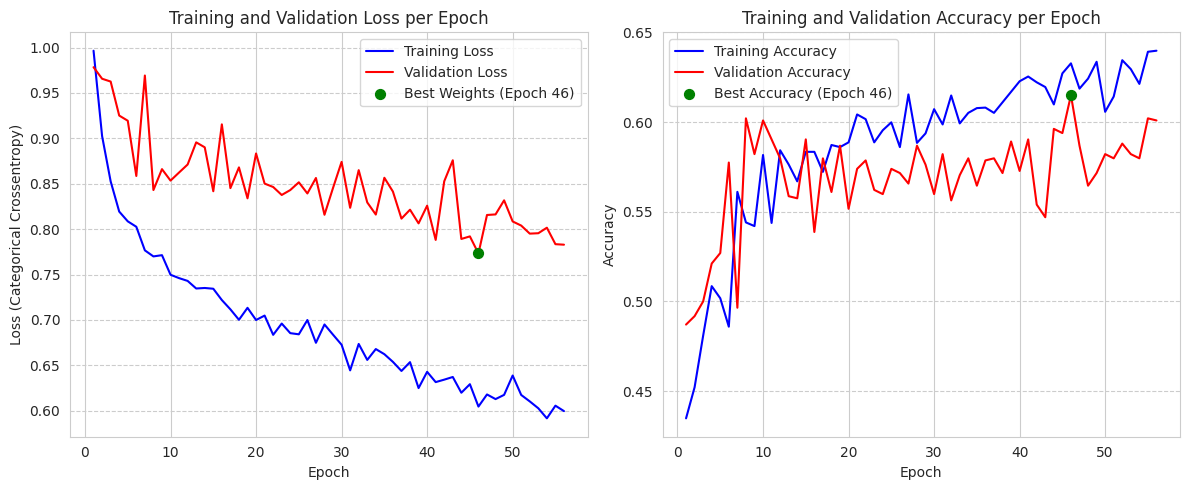

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)
    #plot loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss', color='blue')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss', color='red')

    best_val_loss = min(history.history['val_loss'])
    best_epoch_loss = history.history['val_loss'].index(best_val_loss) + 1

    plt.scatter(best_epoch_loss, best_val_loss, color='green', s=50, zorder=5,
                label=f'Best Weights (Epoch {best_epoch_loss})')

    plt.title('Training and Validation Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (Categorical Crossentropy)')
    plt.legend()
    plt.grid(axis='y', linestyle='--')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='red')

    best_val_acc = max(history.history['val_accuracy'])
    best_epoch_acc = history.history['val_accuracy'].index(best_val_acc) + 1

    plt.scatter(best_epoch_acc, best_val_acc, color='green', s=50, zorder=5,
                label=f'Best Accuracy (Epoch {best_epoch_acc})')

    plt.title('Training and Validation Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

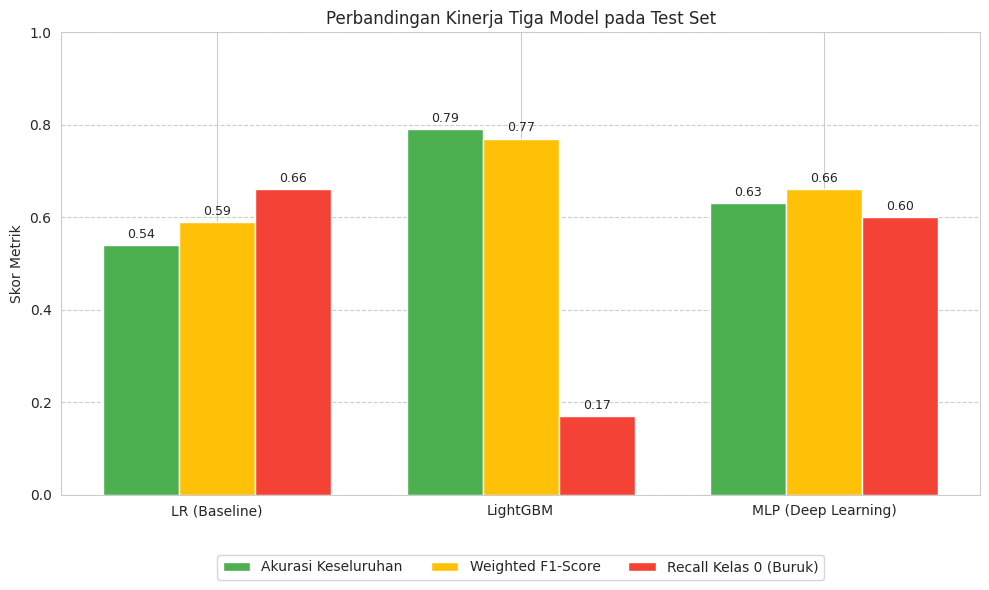

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['LR (Baseline)', 'LightGBM', 'MLP (Deep Learning)']
accuracy = [0.54, 0.79, 0.63]
weighted_f1 = [0.59, 0.77, 0.66]
recall_class_0 = [0.66, 0.17, 0.60]

x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting Bars
rects1 = ax.bar(x - width, accuracy, width, label='Akurasi Keseluruhan', color='#4CAF50')
rects2 = ax.bar(x, weighted_f1, width, label='Weighted F1-Score', color='#FFC107')
rects3 = ax.bar(x + width, recall_class_0, width, label='Recall Kelas 0 (Buruk)', color='#F44336')

# Fungsi untuk menambahkan label di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.set_ylabel('Skor Metrik')
ax.set_title('Perbandingan Kinerja Tiga Model pada Test Set')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)
ax.grid(axis='y', linestyle='--')
ax.set_ylim(0, 1.0)

plt.tight_layout()
plt.show()

In [46]:
import joblib

filename = 'model_baseline_lr.pkl'

joblib.dump(model_baseline, filename)
print(f"Model berhasil disimpan sebagai {filename}")

from google.colab import files
files.download(filename)

Model berhasil disimpan sebagai model_baseline_lr.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
import joblib

filename = 'model_advanced_lgbm.pkl'

joblib.dump(model_advanced, filename)

print(f"Model berhasil disimpan sebagai {filename}")

from google.colab import files
files.download(filename)

Model berhasil disimpan sebagai model_advanced_lgbm.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

filename = 'model_advanced_lgbm.pkl'

joblib.dump(model_advanced, filename)

print(f"Model berhasil disimpan sebagai {filename}")

from google.colab import files
files.download(filename)

In [52]:

model_dl.save('model_deep_learning_mlp.h5')

print("Model Deep Learning berhasil disimpan sebagai model_deep_learning_mlp.h5")

from google.colab import files
files.download('model_deep_learning_mlp.h5')

Model Deep Learning berhasil disimpan sebagai model_deep_learning_mlp.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>